# Finding the node hierarchies and covers of an anatomical neural network
In this example, we explore the 

In [1]:
T = True
F = False
# Personal libs ---- 
from modules.hieraranalysis import Hierarchy
from plotting_jupyter.plotting_H import Plot_H
from plotting_jupyter.plotting_N import Plot_N
from modules.colregion import colregion
from networks.mac29 import MAC29
from various.network_tools import *

In [2]:

# Declare global variables ----
linkage = "single"
nlog10 = T
lookup = F
prob = F
cut = F
mode = "ZERO"
topology = "MIX"
index  = "S1_2"

# Load structure ----
NET = MAC29()

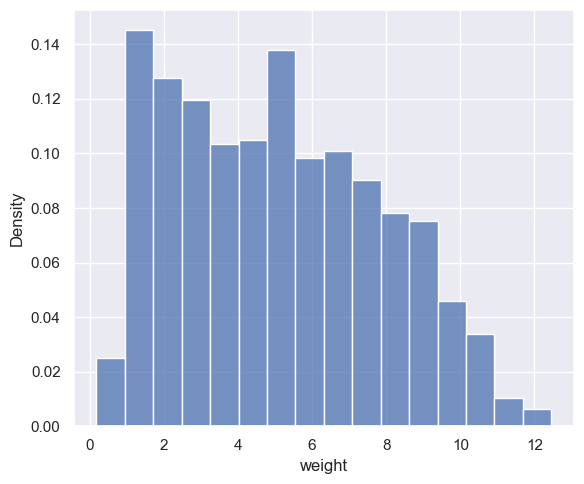

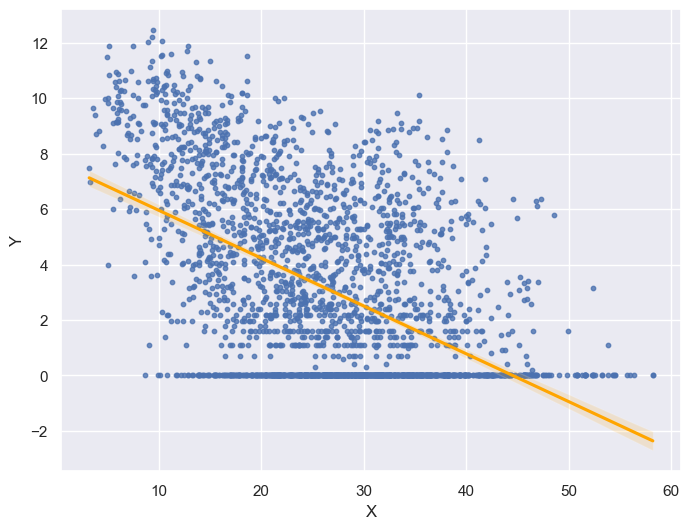

In [3]:
plot_n = Plot_N()
plot_n.histogramX(np.log(1+NET.C), width=6, height=5)
plot_n.regXY(NET.D[:, :NET.nodes], np.log(1 + NET.C), s=10)

In [4]:
## Hierarchy object!! ----
H = Hierarchy(
    NET.C, NET.nodes, linkage, mode,
    topology=topology,
    index=index,
    lookup=lookup
)
H.compute_H_features_cpp()
H.link_entropy_cpp("short", cut=cut)
H.la_abre_a_merde_cpp()
H.node_entropy_cpp("short", cut=cut)
H.set_entropy([
  H.node_entropy, H.node_entropy_H,
  H.link_entropy, H.link_entropy_H
])
# Set labels to network ----
L = colregion(NET)
L.get_regions((T, NET.regions))
H.set_colregion(L)

Compute link hierarchical agglomeration ----
	> Compute features
Starting Z2dict

	link entropy :  Sh : 0.4114, and Sv : 0.5886


	link entropy H: Sh : 0.4111, and Sv : 0.5889

	> Compute the node hierarchy ----
Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 1071
Commencer: la abre a merde
25%
50%
75%
Voila, bon ami
Starting Z2dict
Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 57

	Node entropy :  Sh : 0.2390, and Sv : 0.7610


	Node entropy H: Sh : 0.2137, and Sv : 0.7863



	> Visualize Hierarchical Entropy by levels!!!
Levels node hierarchy: 13
Levels link hierarchy: 38
            S dir                 c  level
34   0.051426   H  node_hierarchy_H      5
47   0.151007   V  node_hierarchy_H      5
5    0.051063   H    node_hierarchy      8
17   0.088875   V    node_hierarchy      9
150  0.035983   H  link_hierarchy_H     16
188  0.040106   V  link_hierarchy_H     16
73   0.026775   H    link_hierarchy     17
110  0.027376   V    link_hierarchy     18
	> Plot D as a function of K
	> Plot loop entropy as a function of K


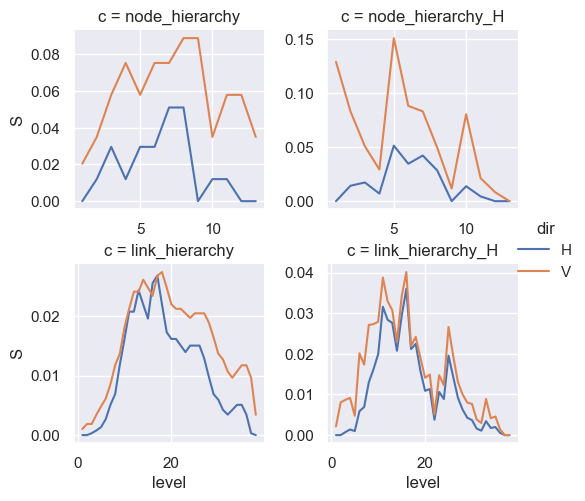

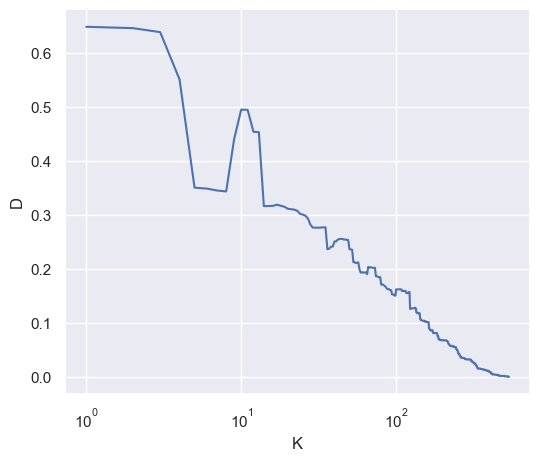

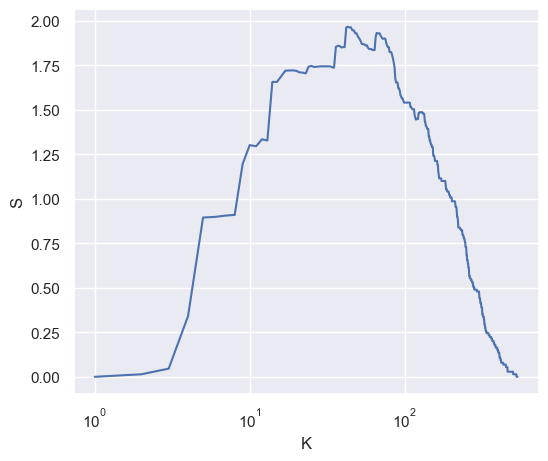

In [5]:
plot_h = Plot_H(H)
plot_h.plot_Hierarchical_Entropy(width=6, height=5)
plot_h.plotD(width=6, height=5)
plot_h.plotSloop(width=6, height=5)

/var/folders/qk/02c8jsfd5dd9zjj2qvs2gwsw0000gn/T/ipykernel_53784/989786530.py:1: RuntimeWarning: divide by zero encountered in log
  plot_n.regXY(NET.D[:NET.nodes, :NET.nodes], np.log(H.target_sim_matrix), s=10, lowess=T, width=6, height=4)
/var/folders/qk/02c8jsfd5dd9zjj2qvs2gwsw0000gn/T/ipykernel_53784/989786530.py:2: RuntimeWarning: divide by zero encountered in log
  plot_n.regXY(NET.D[:NET.nodes, :NET.nodes], np.log(H.source_sim_matrix), s=10, lowess=T, width=6, height=4)
/var/folders/qk/02c8jsfd5dd9zjj2qvs2gwsw0000gn/T/ipykernel_53784/989786530.py:3: RuntimeWarning: divide by zero encountered in log
  plot_n.regXY(np.log(H.source_sim_matrix), np.log(H.target_sim_matrix), s=10, width=6, height=4)


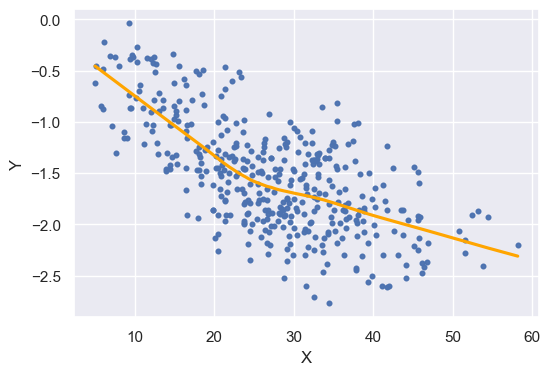

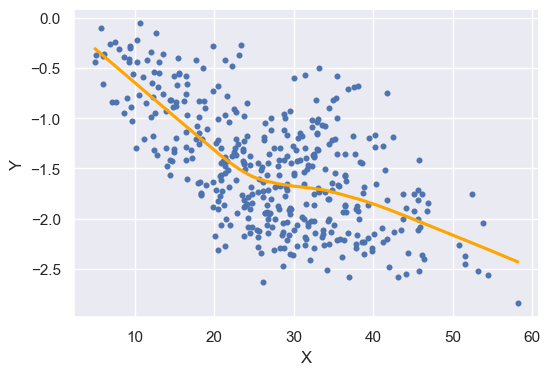

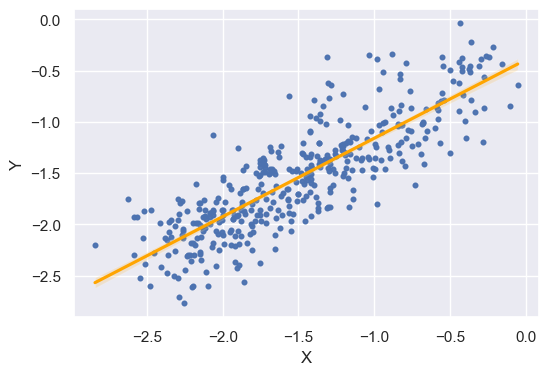

In [6]:

plot_n.regXY(NET.D[:NET.nodes, :NET.nodes], np.log(H.target_sim_matrix), s=10, lowess=T, width=6, height=4)
plot_n.regXY(NET.D[:NET.nodes, :NET.nodes], np.log(H.source_sim_matrix), s=10, lowess=T, width=6, height=4)
plot_n.regXY(np.log(H.source_sim_matrix), np.log(H.target_sim_matrix), s=10, width=6, height=4)

Find node partition using _S
Best K: 43
Best R: 8	 Score: _S


/Users/jmarti53/Documents/Projects/LINKPROJECT/ELK/modules/hieraranalysis.py:344: RuntimeWarning: divide by zero encountered in divide
  Dsource = 1 / self.source_sim_matrix + 1
/Users/jmarti53/Documents/Projects/LINKPROJECT/ELK/modules/hieraranalysis.py:345: RuntimeWarning: divide by zero encountered in divide
  Dtarget = 1 / self.target_sim_matrix + 1


['7a' '7b' '7m']
Visualize nodal dendrogram!!!


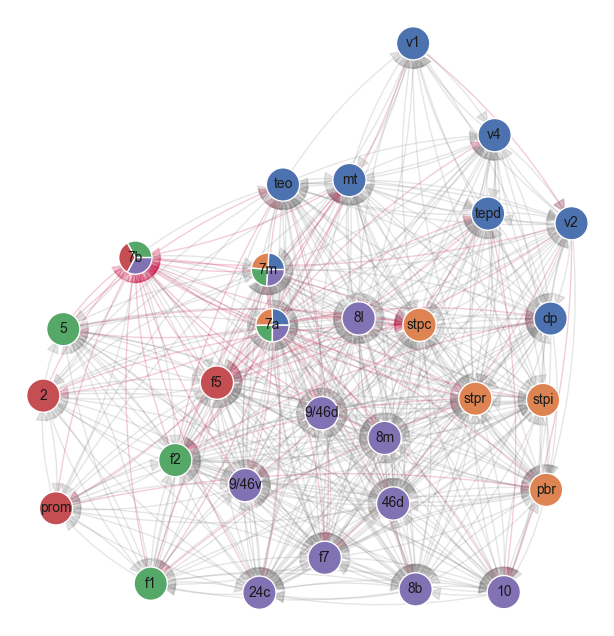

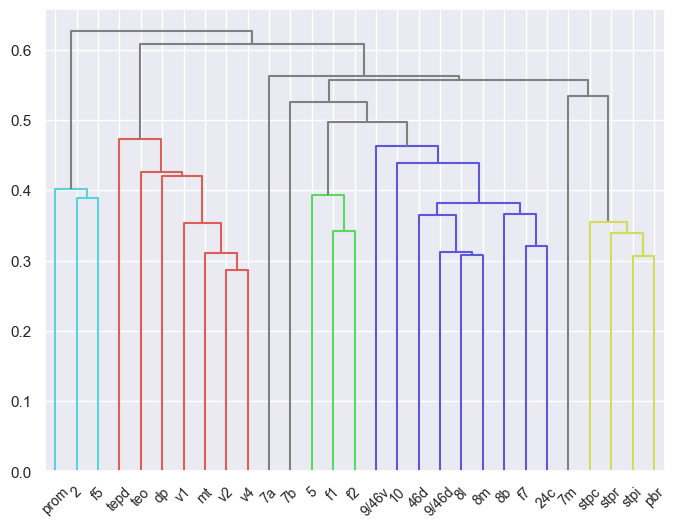

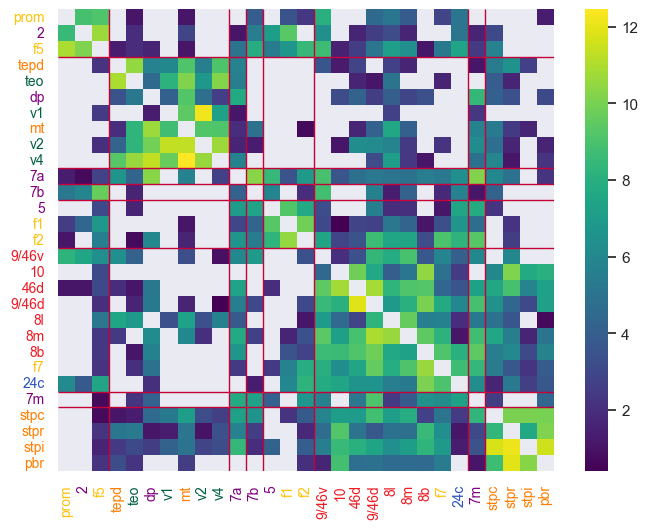

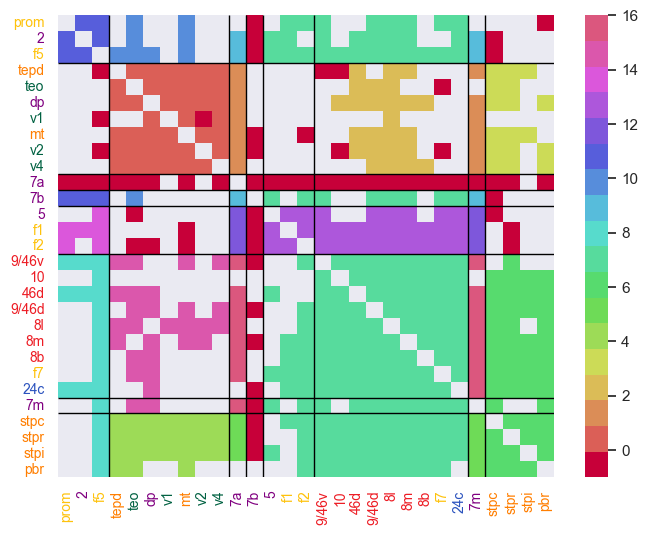

In [7]:
SCORE = "_S"
k, r = get_best_kr_equivalence(SCORE, H)
print(f"Find node partition using {SCORE}")
print("Best K: {}\nBest R: {}\t Score: {}".format(k, r, SCORE))
rlabels = get_labels_from_Z(H.Z, r)
# Overlap ----
overlap, nocs_covers, nocs_sizes  = H.discovery(k, rlabels)
print(overlap)
plot_h.plot_network_combined(
  k, np.log(1 + NET.C[:NET.nodes, :]), rlabels,
  nocs_covers, nocs_sizes, cmap_name="deep", font_size=10
)
plot_h.nodal_dendrogram(r, width=8, height=6) #
plot_h.heatmap_dendro(r, np.log(1+NET.C[:NET.nodes, :]), font_size=10, width=8, height=6)
plot_h.lcmap_dendro(r, k, font_size = 10, width=8, height=6)